IMPORTING THE REQUIRED MODULES AND LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tqdm
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
import random
import tensorflow

Create DataFrame for Input and Output

In [2]:
directory = "/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages"
input_path = []  
label = []       

for class_name in os.listdir(directory):
    class_path = os.path.join(directory, class_name)
    
    if os.path.isdir(class_path):
        for path in os.listdir(class_path):
            image_path = os.path.join(class_path, path)
            input_path.append(image_path)
            if class_name == 'Cat':
                label.append(0)
            elif class_name == 'Dog':
                label.append(1)

Delete db files

In [39]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)


/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Dog/Thumbs.db
/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Cat/Thumbs.db


In [44]:
import PIL
l=[]
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l
    

['/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Dog/11702.jpg',
 '/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Cat/666.jpg']

In [47]:
df = df[df['images'] !='/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Dog/Thumbs.db' ]
df = df[df['images'] !='/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Cat/Thumbs.db']
df = df[df['images'] !='/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Dog/11702.jpg']
df = df[df['images'] !='/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Cat/666.jpg']
len(df)

24998

In [48]:
df=pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop = True)

In [49]:
df['label']=df['label'].astype('str')

In [50]:
df.head()

,images,label
0,/Users/admin/Downloads/kagglecatsanddogs_5340/...,0
1,/Users/admin/Downloads/kagglecatsanddogs_5340/...,0
2,/Users/admin/Downloads/kagglecatsanddogs_5340/...,1
3,/Users/admin/Downloads/kagglecatsanddogs_5340/...,0
4,/Users/admin/Downloads/kagglecatsanddogs_5340/...,1


In [51]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = tensorflow.keras.utils.load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

In [52]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = tensorflow.keras.utils.load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

<Axes: ylabel='count'>

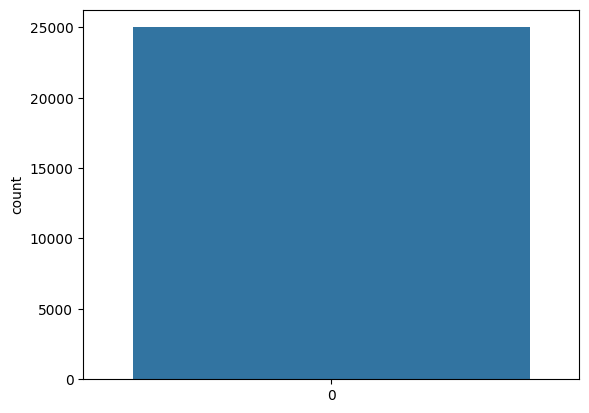

In [53]:
import seaborn as sns
sns.countplot(df['label'])

DataGenerators for the images

In [54]:
#input split
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.2,random_state = 42)

In [55]:
train.head()

,images,label
16248,/Users/admin/Downloads/kagglecatsanddogs_5340/...,0
695,/Users/admin/Downloads/kagglecatsanddogs_5340/...,0
17155,/Users/admin/Downloads/kagglecatsanddogs_5340/...,0
21826,/Users/admin/Downloads/kagglecatsanddogs_5340/...,1
1020,/Users/admin/Downloads/kagglecatsanddogs_5340/...,0


In [56]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,#normalisation of image
    rotation_range = 40,#Augmentation of image To avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    )

val_generator = ImageDataGenerator(1./255)

train_iterator = train_generator.flow_from_dataframe(train,
                                                     x_col = 'images',
                                                     y_col = 'label',
                                                     target_size = (128,128),
                                                     batch_size = 512,
                                                     class_mode = 'binary'
                                                     )
val_iterator = val_generator.flow_from_dataframe(test,
                                                     x_col = 'images',
                                                     y_col = 'label',
                                                     target_size = (128,128),
                                                     batch_size = 512,
                                                     class_mode = 'binary'
                                                     )

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


    CREATING MODEL
   

In [85]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model = Sequential([
    Conv2D(16,(3,3),activation = 'relu',input_shape = (128,128,3)),
     MaxPool2D((2,2)),
     Conv2D(32,(3,3),activation = 'relu'),
     MaxPool2D((2,2)),
     Conv2D(64,(3,3),activation = 'relu'),
     MaxPool2D((2,2)),
     Flatten(),
     Dense(512,activation = 'relu'),
     Dense(1,activation = 'sigmoid')
])

In [86]:
from tensorflow.keras.optimizers.legacy import Adam
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])#adam learns and improves model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 14, 14, 64)      

In [87]:
try:
    history = model.fit(train_iterator, epochs=20, validation_data=val_iterator)
except Exception as e:
    print(f"An error occurred during training: {str(e)}")



Epoch 1/20
An error occurred during training: pybind11::error_already_set: MISMATCH of original and normalized active exception types: ORIGINAL InvalidArgumentError REPLACED BY KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /Users/admin/Desktop/venv/lib/python3.11/site-packages/tensorflow/python/framework/errors_impl.py(284): __init__
  /Users/admin/Desktop/venv/lib/python3.11/site-packages/tensorflow/python/eager/execute.py(53): quick_execute
  /Users/admin/Desktop/venv/lib/python3.11/site-packages/tensorflow/python/eager/context.py(1457): call_function
  /Users/admin/Desktop/venv/lib/python3.11/site-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py(196): __call__
  /Users/admin/Desktop/venv/lib/python3.11/site-packages/tensorflow/python/eager/polymorphic_function/monomorphic_function.py(1349): _call_flat
  /Users/admin/Desktop/venv/lib/python3.11/site-packages/tensorflow/python/eager/polymorphic_function/tracing_compiler.py(148): __call__
  /Users/admin/Desktop/venv